# Análise dos dados de acervo das bibliotecas da UFRN

In [15]:
import re
import pandas as pd
import numpy as np
from os import listdir
import matplotlib.pyplot as plt

## Junção dos datasets

In [2]:
# Variável com os dataframes que iremos usar
dfs = {
    'discentes': None,
    'emprestimos': None,
    'cursos': pd.read_csv('data/cursos-ufrn.csv', sep=';'),
    'exemplares': pd.read_csv('data/exemplares.csv', sep=';'),
    'acervo-exemplares': pd.read_csv('data/exemplares-acervo.csv', sep =";")
}

In [3]:
# Arquivos da pasta de datasets
files = listdir('data')
# Regex para cada tipo de dataset que possui vários arquivos
regex = {
    'discentes': re.compile(r'discentes-20[0-9]{2}'),
    'emprestimos': re.compile(r'emprestimos-20[0-9]{3}'),
}
# Filtros aplicados, lista de arquivos que satisfazem os regex
files_filter = {
    'discentes': list(filter(regex['discentes'].search, files)),
    'emprestimos': list(filter(regex['emprestimos'].search, files)),
}
# Mostra ambas as listas de arquivos
print(files_filter)

{'discentes': ['discentes-2017.csv', 'discentes-2015.csv', 'discentes-2009.csv', 'discentes-2012.csv', 'discentes-2018.csv', 'discentes-2010.csv', 'discentes-2014.csv', 'discentes-2016.csv', 'discentes-2011.csv', 'discentes-2013.csv'], 'emprestimos': ['emprestimos-20122.csv', 'emprestimos-20112.csv', 'emprestimos-20032.csv', 'emprestimos-20072.csv', 'emprestimos-20142.csv', 'emprestimos-20091.csv', 'emprestimos-20062.csv', 'emprestimos-20102.csv', 'emprestimos-20132.csv', 'emprestimos-20092.csv', 'emprestimos-20052.csv', 'emprestimos-20152.csv', 'emprestimos-20081.csv', 'emprestimos-20042.csv', 'emprestimos-20041.csv', 'emprestimos-20002.csv', 'emprestimos-20161.csv', 'emprestimos-20021.csv', 'emprestimos-20022.csv', 'emprestimos-20051.csv', 'emprestimos-20131.csv', 'emprestimos-20162.csv', 'emprestimos-20101.csv', 'emprestimos-20011.csv', 'emprestimos-20121.csv', 'emprestimos-20141.csv', 'emprestimos-20082.csv', 'emprestimos-20171.csv', 'emprestimos-20031.csv', 'emprestimos-20151.csv'

In [5]:
def make_df(filenames):
    '''Pega uma lista de arquivos e retorna um único dataframe gerado.'''
    # Lista de dataframes
    dfs = [pd.read_csv('data/'+filename, sep=';') for filename in filenames]
    # Concatena todos os dataframes em um só
    return pd.concat(dfs, ignore_index=True)

# Junta todos os dados de discentes em um unico dataframe
dfs['discentes'] = make_df(files_filter['discentes'])
# O mesmo para emprestimos
dfs['emprestimos'] = make_df(files_filter['emprestimos'])

O objetivo aqui é encontrar os livros mais alugados pelos alunos do curso de tecnologia da informação (TI). Para encontrar esses dados utilizaremos 3 _DataFrames_: **'acervo-exemplares', 'emprestimos' e 'discentes'**.

In [6]:
#Feito por André para limpar o DataFrame acervo-exemplares
dfs["acervo-exemplares"]["titulo"] = dfs["acervo-exemplares"]["titulo"].str.replace("/", "")
dfs["acervo-exemplares"]["sub_titulo"] = dfs["acervo-exemplares"]["sub_titulo"].str.replace("/", "")
dfs["acervo-exemplares"]["assunto"] = dfs["acervo-exemplares"]["assunto"].str.replace("-", " ")
dfs["acervo-exemplares"]["assunto"] = dfs["acervo-exemplares"]["assunto"].str.replace("#", ", ")
dfs["acervo-exemplares"]["assunto"] = dfs["acervo-exemplares"]["assunto"].str.replace("&", "")
dfs["acervo-exemplares"]["assunto"] = dfs["acervo-exemplares"]["assunto"].str.replace("$", "")
dfs["acervo-exemplares"].head()

,registro_sistema,titulo,sub_titulo,assunto,autor,tipo_material,quantidade,ano,edicao,editora,isbn,issn
0,1,Nordeste: desenvolvimento sem justica,NaN,"Política social , Região Nordeste (Br), Socio...","Ação Católica Operária, Recife.",Livro,3,1967,NaN,NaN,NaN,NaN
1,5,Manual de Psicologia,NaN,Psicologia,"Adcock, C. J.",Livro,1,1965,NaN,"Zahar,",NaN,NaN
2,14,Statistical Abstract Of The United States,NaN,"Estatistica , Estados Unidos., Estatística.",Bureau Of Census.,Livro,1,1959.,NaN,"s.n.],",NaN,NaN
3,15,Verdade contra Freud,NaN,"Psicanálise (Psicologia)., Psicologia.","Andrade, Almir de.",Livro,1,1933.,NaN,"Schmidt,",NaN,NaN
4,16,História de La Urss :,época del socialismo(1917-1957),"Uniao Soviética , História , URSS., 1917 1957.",Academia de Ciências de La U.R.S.S.,Livro,1,1958.,NaN,"Editorial Grijalbo,",NaN,NaN


In [7]:
dfs['emprestimos'].head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,nome_usuario,id_vinculo_usuario,tipo_vinculo_usuario
0,1282500,2009037511,NaN,2012-07-02 08:46:50.254,2012-07-02 08:47:51,SILVESTRE GOMES MARTINS,546431.0,ALUNO DE PÓS-GRADUAÇÃO
1,1282501,2010073018,NaN,2012-07-02 09:11:58.745,2012-09-06 20:38:14,WILLIAM ROSENDO,514567.0,ALUNO DE GRADUAÇÃO
2,1282502,2012009920,NaN,2012-07-02 09:11:58.808,2012-09-06 20:38:17,WILLIAM ROSENDO,514567.0,ALUNO DE GRADUAÇÃO
3,1282503,2012010334,NaN,2012-07-02 09:11:58.876,2012-09-06 20:38:22,WILLIAM ROSENDO,514567.0,ALUNO DE GRADUAÇÃO
4,1282504,2007013584,2012-08-06 23:03:54.648,2012-07-02 09:11:59.409,2012-09-06 17:05:49,CLAUDIA REGINA REZENDE FERREIRA,550655.0,ALUNO DE PÓS-GRADUAÇÃO


Abaixo é realizado o primeiro filtro, no _DataFrame_ **'discentes'**, onde se pega apenas os alunos do curso de **TECNOLOGIA DA INFORMAÇÃO**.

In [8]:
discentes_ti = dfs['discentes'][dfs['discentes'].nome_curso == 'TECNOLOGIA DA INFORMAÇÃO']
discentes_ti.head()

,matricula,nome_discente,ano_ingresso,periodo_ingresso,forma_ingresso,tipo_discente,status,sigla_nivel_ensino,nivel_ensino,id_curso,nome_curso,modalidade_educacao,id_unidade,nome_unidade,id_unidade_gestora,nome_unidade_gestora
29,2.017006e+10,ABMAEL DANTAS GOMES,2017,1.0,SiSU,REGULAR,ATIVO,G,GRADUAÇÃO,92127264.0,TECNOLOGIA DA INFORMAÇÃO,PRESENCIAL,6069.0,INSTITUTO METROPOLE DIGITAL,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
42,2.017007e+10,ABRAAO VITOR LOPES DANTAS,2017,1.0,SiSU,REGULAR,ATIVO,G,GRADUAÇÃO,92127264.0,TECNOLOGIA DA INFORMAÇÃO,PRESENCIAL,6069.0,INSTITUTO METROPOLE DIGITAL,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
184,2.017011e+10,ADRIANO DA SILVA OLIVEIRA,2017,1.0,SiSU,REGULAR,CANCELADO,G,GRADUAÇÃO,92127264.0,TECNOLOGIA DA INFORMAÇÃO,PRESENCIAL,6069.0,INSTITUTO METROPOLE DIGITAL,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
297,2.017008e+10,AITAN MEDEIROS MILITÃO,2017,1.0,SiSU,REGULAR,TRANCADO,G,GRADUAÇÃO,92127264.0,TECNOLOGIA DA INFORMAÇÃO,PRESENCIAL,6069.0,INSTITUTO METROPOLE DIGITAL,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
436,2.017013e+10,ALDGLYR OLIVEIRA DIAS,2017,1.0,SiSU,REGULAR,ATIVO,G,GRADUAÇÃO,92127264.0,TECNOLOGIA DA INFORMAÇÃO,PRESENCIAL,6069.0,INSTITUTO METROPOLE DIGITAL,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE


Após pegar as informações apenas dos alunos de TI, é feito o primeiro merge entre informações. Primeiro, verifica-se os emprestimos já realizados pelos estudantes do curso, para isso, descobre-se que o ponto em comum entre o _DataFrame_ **'emprestimos'** e o que possue os alunos de TI é a coluna **'nome_discente'** e **'nome_usuario'**. Após, é feita uma mesclagem com **'exemplares'** utilizando como ponto em comum a informação de **'codigo_barras'**, dessa forma foi obtido as informações dos livros, exceto o nome. Para adquirir o título do livro, é feita mais uma fundição com o **'acervo-exemplares'**, tendo a chave **'registro_sistema'**.

In [22]:
#Para pegar os emprestimos realizados pelos discentes de TI
merged_by_nome_usuario = pd.merge(discentes_ti, dfs['emprestimos'], left_on='nome_discente', right_on='nome_usuario')

#Para pegar as informações dos livros alugados por alunos de TI
merged_by_codigo_barras = pd.merge(dfs['exemplares'], merged_by_nome_usuario, left_on='codigo_barras', right_on='codigo_barras')

#Para pegar nome dos livros
merged_by_registro_sistema = pd.merge(dfs['acervo-exemplares'], merged_by_codigo_barras, left_on='registro_sistema', right_on='registro_sistema')

top5_livros_alugados = merged_by_registro_sistema['titulo'].value_counts().head(5)

top5_livros_alugados

Cálculo                                   1393
Fundamentos de física                      576
Linguagem C                                487
Matemática discreta e suas aplicações      441
Física                                     402
Name: titulo, dtype: int64

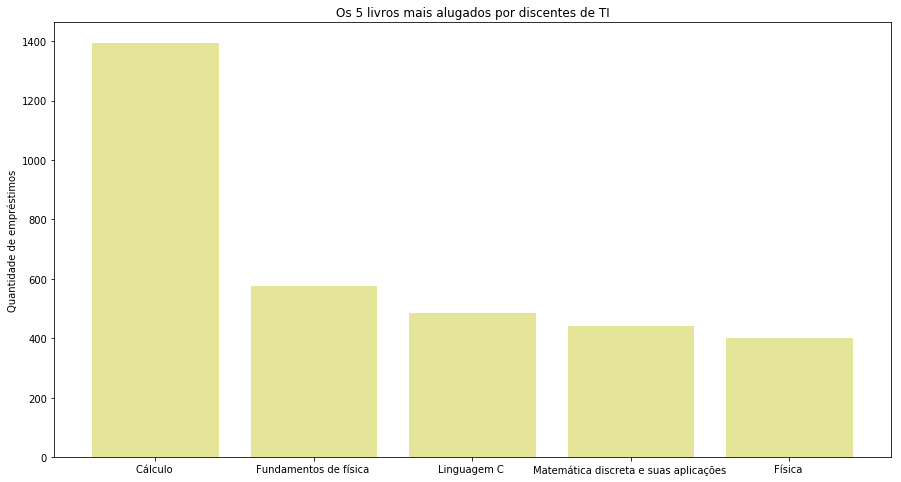

In [21]:
# Definimos o tamanho da figura que terá o gráfico
plt.figure(figsize=(15,8))

plt.bar(top5_livros_alugados.keys(), top5_livros_alugados.values, alpha=0.4, color='y')
    
# Demais configurações do gráfico
plt.ylabel('Quantidade de empréstimos')
plt.title('Os 5 livros mais alugados por discentes de TI')

# Exibindo o gráfico
plt.show()